In [1]:
import cv2
import string
from matplotlib import pyplot as plt
from math import log10, sqrt
import numpy as np

In [2]:
dict1={}
dict2={}

for i in range(256):
    dict1[chr(i)]=i
    dict2[i]=chr(i)


In [3]:
img1 = cv2.imread("Cover_1.png")
temp= cv2.imread("Cover_1.png")


In [4]:
img1=cv2.resize(img1, (256,256))
temp=cv2.resize(temp, (256,256))
row,col,dim=temp.shape
print(row,col,dim)

256 256 3


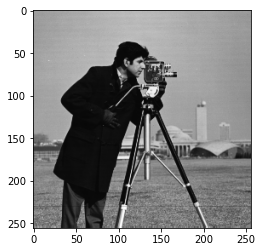

In [5]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
while(1):
    key=input("Enter the security key : \n")
    if len(key)==0:
        print("Key size cannot be 0 .. \nReEnter Key")
    else:
        break
message=input("\nEnter the message to be hidden : \n")
key_indx=0
message_len=len(message)

r=0
c=0
d=0

Enter the security key : 
1234

Enter the message to be hidden : 
hi swaraaj


In [16]:
#   #Encryption
l=len(message)

for i in range(l):
    img1[r,c,d]=dict1[message[i]]^dict1[key[key_indx]]
    r=(r+1)
    c=(c+1)
    d=(d+1)%3
    key_indx=(key_indx+1)%len(key)

In [14]:
cv2.imwrite("enc_img.png",img1)
print("The data is hided and encrypted image is saved successfully")


The data is hided and encrypted image is saved successfully


In [17]:
key_indx=0
l=len(message)
r=0
c=0
d=0
#Decrypt

key1=input("\nReEnter key to decrypt : ")
decrypt=""
if(key==key1):
    for i in range(l):  #
        
        decrypt+=dict2[img1[r,c,d]^dict1[key[key_indx]]]
        r=(r+1)
        c=(c+1)
        d=(d+1)%3
        key_indx=(key_indx+1)%len(key)
    print("Message decrypted Successfully")
    print("Message was: ",decrypt)
else:
    print("Invalid Key")



ReEnter key to decrypt : 1234
Message decrypted Successfully
Message was:  hi swaraaj


Encrypted Image


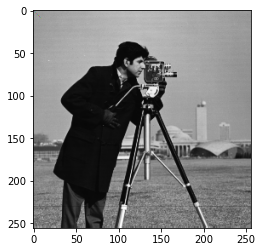

Decrypted Image


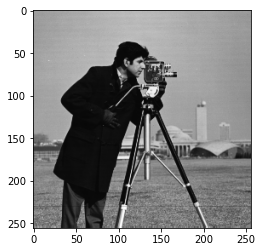

In [11]:
if key==key1:
    print("Encrypted Image")
    x= cv2.imread("enc_img.png")
    plt.imshow(cv2.cvtColor(x, cv2.COLOR_BGR2RGB))
    plt.show()


    print("Decrypted Image")
    plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("INPUT IMAGE")
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.show()
    print("Exiting....")

In [12]:
x=cv2.imread("enc_img.png")
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
original = img1
compressed = temp
value = PSNR(original, compressed)
print(f"PSNR value is {value} dB")

PSNR value is 69.00395501798839 dB
